In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import shap
import matplotlib.pyplot as plt 
import seaborn as sns

g:\AnacondaIDE\envs\sign\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [152]:
data = pd.read_csv('depression_anxiety_data.csv')

In [153]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


C:\Users\ry444\AppData\Local\Temp\ipykernel_21248\3614670353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\ry444\AppData\Local\Temp\ipykernel_21248\3614670353.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [154]:
data['depression_severity'].unique()

array(['Mild', 'Moderately severe', 'None-minimal', 'Moderate', 'Severe',
       'none'], dtype=object)

In [155]:
data['anxiety_severity'].unique()

array(['Moderate', 'Mild', 'Severe', 'None-minimal', '0'], dtype=object)

In [156]:
scaler = StandardScaler()
numerical_features = ['school_year','age', 'bmi', 'phq_score', 'gad_score','epworth_score']  
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [157]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])


In [158]:
# Display the original labels and their corresponding encoded values
original_labels = label_encoder.classes_  # This gives you the original labels
encoded_labels = range(len(original_labels))  # This gives you the corresponding encoded values

# Print the mapping
for original, encoded in zip(original_labels, encoded_labels):
    print(f"Original: {original} -> Encoded: {encoded}")

Original: female -> Encoded: 0
Original: male -> Encoded: 1


In [159]:
data['depression_severity'] = label_encoder.fit_transform(data['depression_severity'])


In [160]:
original_labels = label_encoder.classes_  # This gives you the original labels
encoded_labels = range(len(original_labels))  # This gives you the corresponding encoded values

# Print the mapping
for original, encoded in zip(original_labels, encoded_labels):
    print(f"Original: {original} -> Encoded: {encoded}")

Original: Mild -> Encoded: 0
Original: Moderate -> Encoded: 1
Original: Moderately severe -> Encoded: 2
Original: None-minimal -> Encoded: 3
Original: Severe -> Encoded: 4
Original: none -> Encoded: 5


In [161]:

data['anxiety_severity'] = pd.Categorical(data['anxiety_severity'], 
                                           categories=['0','None-minimal', 'Mild', 'Moderate', 'Severe'], 
                                           ordered=True)
data['anxiety_severity'] = data['anxiety_severity'].cat.codes


In [162]:
data['anxiety_severity'].unique()

array([3, 2, 4, 1, 0], dtype=int8)

In [163]:
anxiety_features = ['age', 'gender', 'bmi', 'phq_score', 'anxiety_severity','epworth_score','gad_score']
X_anxiety = data[anxiety_features]
y_anxiety = data['depression_severity']

In [164]:
X_anxiety

,age,gender,bmi,phq_score,anxiety_severity,epworth_score,gad_score
0,-0.698559,1,2.173519,0.424101,3,0.156849,0.886690
1,-1.264782,1,-0.784803,0.198049,2,1.918561,-0.383331
2,-0.698559,1,0.368771,0.198049,2,-0.094824,-0.171661
3,-1.264782,0,0.069754,2.684625,4,1.163542,1.733370
4,-1.264782,1,0.481668,-0.254056,3,-0.849843,1.521700
...,...,...,...,...,...,...,...
778,2.132557,0,-0.509644,-0.254056,1,-0.849843,-1.230012
779,1.000111,1,0.413994,-0.706161,2,-0.849843,-0.171661
780,1.000111,1,-0.153505,-1.158266,2,-0.598170,-0.383331
781,1.000111,0,-0.084935,2.232521,4,2.170234,2.580051


In [165]:
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_anxiety, y_anxiety, test_size=0.2, random_state=42)


In [166]:
depression_model = RandomForestClassifier(random_state=42)
depression_model.fit(X_train_anxiety, y_train_anxiety)

RandomForestClassifier(random_state=42)

In [167]:
y_pred_anxiety = depression_model.predict(X_test_anxiety)
print("Anxiety Severity Detection:")
print(confusion_matrix(y_test_anxiety, y_pred_anxiety))
print(classification_report(y_test_anxiety, y_pred_anxiety))
accuracy_score(y_test_anxiety,y_pred_anxiety)

Anxiety Severity Detection:
[[66  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  1 12  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       0.96      1.00      0.98        24
           2       1.00      0.92      0.96        13
           3       0.98      1.00      0.99        50
           4       1.00      1.00      1.00         1
           5       1.00      0.67      0.80         3

    accuracy                           0.99       157
   macro avg       0.99      0.93      0.95       157
weighted avg       0.99      0.99      0.99       157



0.9872611464968153

In [168]:
import joblib

# Save the anxiety model
joblib.dump(depression_model, 'depression_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [169]:
def simple_shap_analysis(model, input_data):
    """
    Simple SHAP analysis showing feature importance
    """
    # Create explainer
    explainer = shap.TreeExplainer(model)

    # Calculate SHAP values
    shap_values = explainer.shap_values(input_data)

    # If the model is multi-class, handle separately
    if isinstance(shap_values, list):
        shap_values = shap_values[0]  # Take first class for binary classification

    # Convert input_data to DataFrame
    input_df = pd.DataFrame(input_data, columns=[
        'Age', 'Gender', 'BMI', 'PHQ Score', 'Anxiety Severity', 'Epworth Score', 'GAD Score'
    ])

    # Create simple summary plot
    shap.summary_plot(shap_values, input_df)

In [170]:
def predict_anxiety_severity():
    # Load the saved model and label encoder
    depression_model = joblib.load('depression_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    
    try:
        age = float(input("Enter age: "))
        gender = input("Enter gender (male/female): ")
        bmi = float(input("Enter BMI: "))
        phq_score = float(input("Enter PHQ Score: "))
        anxiety_severity = input("Enter Anxiety Severity: ")
        epworth_score = float(input("Enter epworth Score: "))
        gad_score = float(input("Enter gad Score: "))
    except ValueError:
        print("Error: Please enter valid numerical values for age, BMI, and PHQ Score.")
        return
    
    # Prepare the input data for prediction
    input_data = np.array([[age, gender, bmi, phq_score, anxiety_severity,epworth_score,gad_score]], dtype=float)
    
    # Make prediction
    prediction = depression_model.predict(input_data)
    print("P:",prediction)
    # Decode the prediction
    predicted_severity = label_encoder.inverse_transform(prediction)
    
    print(f"Predicted Anxiety Severity: {predicted_severity[0]}")

    input_data = input_data.reshape(1, -1)
    simple_shap_analysis(depression_model, input_data)


g:\AnacondaIDE\envs\sign\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


P: [4]
Predicted Anxiety Severity: Severe


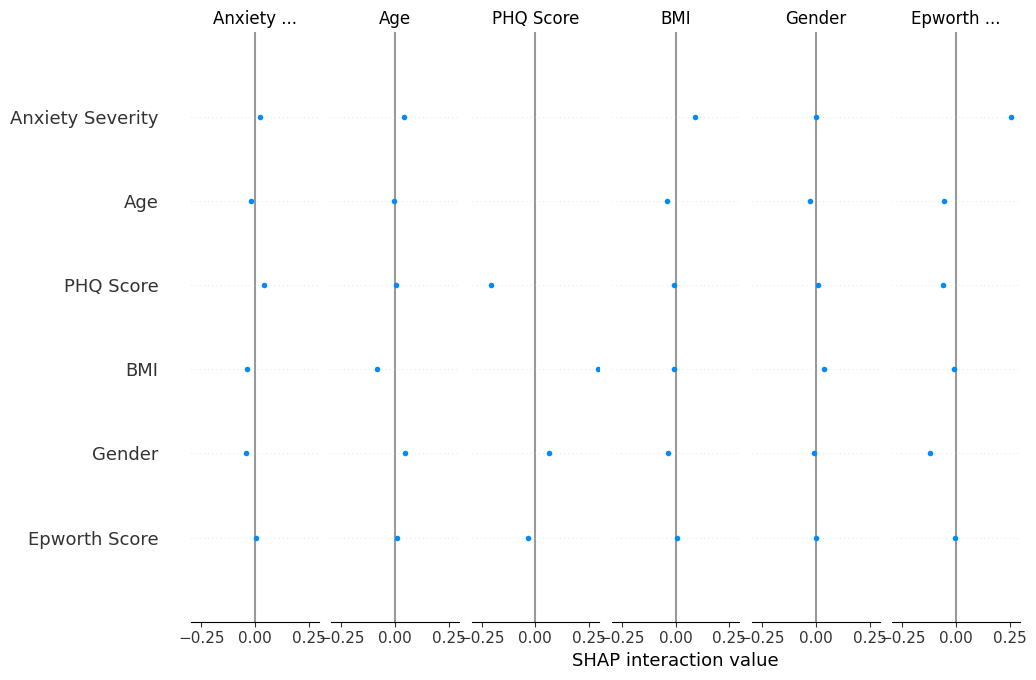

In [137]:
predict_anxiety_severity()